In [1]:
import pandas as pd
import numpy as np
import os
import datetime


In [67]:
data = pd.read_parquet('aapl_factors.parquet')
data

,DT,ret1min,ret5min,ret10min,ret15min,ret20min,ret25min,ret30min,ret60min,ret120min,...,vol30min,vol60min,vol120min,vol180min,bbands,chaikinvol,roc,snr,vwap,fwd1min
0,2022-04-28 06:59:00-04:00,0.000625,0.000688,0.000688,-0.000562,-0.000187,-0.000187,0.000312,0.000062,-0.004602,...,0.009340,0.022076,0.056477,0.076572,159.841684,-0.336916,0.000625,1.390763,159.986809,0.000562
1,2022-04-28 07:00:00-04:00,0.000562,0.001500,0.001438,0.000125,0.001250,0.000437,0.001000,0.000312,-0.004041,...,0.009902,0.022240,0.052796,0.073062,159.842496,-0.054040,0.000874,1.952618,160.146361,0.001061
2,2022-04-28 07:01:00-04:00,0.001061,0.002626,0.002375,0.001874,0.002062,0.002187,0.002124,0.001436,-0.002860,...,0.013096,0.023679,0.049896,0.071434,159.822099,0.341899,0.001123,3.620235,160.257329,0.000811
3,2022-04-28 07:02:00-04:00,0.000811,0.003439,0.003439,0.002812,0.001685,0.003125,0.002812,0.002185,-0.001679,...,0.018925,0.026524,0.047155,0.070986,159.787198,0.402044,0.000748,5.024253,160.336798,0.000062
4,2022-04-28 07:03:00-04:00,0.000062,0.003376,0.003439,0.002812,0.001498,0.002874,0.002248,0.002686,-0.001431,...,0.024452,0.029341,0.045319,0.071124,159.751605,0.535860,0.000000,4.931758,160.360186,0.000062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240550,2022-04-27 19:55:00-04:00,0.000851,-0.000283,0.001040,0.000283,-0.000346,0.001198,0.001040,0.000599,-0.001854,...,0.007473,0.006805,0.015678,0.041951,158.605114,0.458880,0.000851,1.161605,158.738845,-0.000756
240551,2022-04-27 19:56:00-04:00,-0.000756,-0.001007,-0.000315,-0.000473,-0.000945,0.000252,0.000221,0.000000,-0.002515,...,0.007420,0.006747,0.014902,0.041618,158.599972,0.290279,-0.000914,0.000000,158.763933,0.000630
240552,2022-04-27 19:57:00-04:00,0.000630,-0.000063,-0.000755,0.000000,-0.000567,0.000252,0.000567,0.000630,-0.002012,...,0.007255,0.006772,0.013942,0.041422,158.601336,0.080373,0.000630,0.454087,158.772974,0.000252
240553,2022-04-27 19:58:00-04:00,0.000252,-0.000189,-0.000629,0.000504,0.000031,0.000347,0.000567,0.000693,-0.001635,...,0.007271,0.006881,0.013035,0.041131,158.602393,-0.125516,0.000126,0.397078,158.772151,0.000252


In [68]:
data = data.dropna()

In [69]:
data['DT'] = pd.to_datetime(data['DT'])
data.set_index('DT',inplace=True)

C:\Users\julia\AppData\Local\Temp\ipykernel_29536\4022153838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DT'] = pd.to_datetime(data['DT'])


In [70]:
train = data.iloc[:230000,:]
test = data.iloc[230001:240554,:]

In [47]:
train

,ret1min,ret5min,ret10min,ret15min,ret20min,ret25min,ret30min,ret60min,ret120min,ret180min,...,vol30min,vol60min,vol120min,vol180min,bbands,chaikinvol,roc,snr,vwap,fwd1min
DT,,,,,,,,,,,,,,,,,,,,,
2022-04-28 06:59:00-04:00,0.000625,0.000688,0.000688,-0.000562,-0.000187,-0.000187,0.000312,0.000062,-0.004602,0.004708,...,0.009340,0.022076,0.056477,0.076572,159.841684,-0.336916,0.000625,1.390763,159.986809,0.000562
2022-04-28 07:00:00-04:00,0.000562,0.001500,0.001438,0.000125,0.001250,0.000437,0.001000,0.000312,-0.004041,0.004389,...,0.009902,0.022240,0.052796,0.073062,159.842496,-0.054040,0.000874,1.952618,160.146361,0.001061
2022-04-28 07:01:00-04:00,0.001061,0.002626,0.002375,0.001874,0.002062,0.002187,0.002124,0.001436,-0.002860,0.003567,...,0.013096,0.023679,0.049896,0.071434,159.822099,0.341899,0.001123,3.620235,160.257329,0.000811
2022-04-28 07:02:00-04:00,0.000811,0.003439,0.003439,0.002812,0.001685,0.003125,0.002812,0.002185,-0.001679,0.003188,...,0.018925,0.026524,0.047155,0.070986,159.787198,0.402044,0.000748,5.024253,160.336798,0.000062
2022-04-28 07:03:00-04:00,0.000062,0.003376,0.003439,0.002812,0.001498,0.002874,0.002248,0.002686,-0.001431,0.001560,...,0.024452,0.029341,0.045319,0.071124,159.751605,0.535860,0.000000,4.931758,160.360186,0.000062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-18 19:14:00-05:00,-0.000236,-0.000825,-0.000590,-0.000413,-0.000649,-0.004582,-0.001061,-0.003235,-0.003176,-0.003059,...,0.005321,0.214926,0.121971,0.099645,169.494592,-0.038800,-0.000236,1.128629,169.530892,-0.000236
2022-01-18 19:15:00-05:00,-0.000236,-0.000649,-0.000649,-0.000649,-0.000825,-0.000708,-0.000943,-0.003587,-0.003118,-0.002619,...,0.005582,0.214311,0.122999,0.100930,169.481639,-0.057840,0.000059,1.516163,169.515645,-0.000059
2022-01-18 19:16:00-05:00,-0.000059,-0.000590,-0.000531,-0.000825,-0.001120,-0.000472,-0.001532,-0.003235,-0.003294,-0.002883,...,0.005842,0.213689,0.124197,0.102138,169.467003,0.005871,-0.000059,1.496848,169.506126,-0.000236


In [71]:
train.isna().any()

ret1min       False
ret5min       False
ret10min      False
ret15min      False
ret20min      False
ret25min      False
ret30min      False
ret60min      False
ret120min     False
ret180min     False
ema5          False
ema10         False
ema15         False
ema20         False
ema25         False
ema30         False
ema60         False
ema120        False
ema180        False
macd          False
rsi           False
mfi           False
vol5min       False
vol10min      False
vol30min      False
vol60min      False
vol120min     False
vol180min     False
bbands        False
chaikinvol    False
roc           False
snr           False
vwap          False
fwd1min       False
dtype: bool

In [72]:
train.iloc[:,33:34]

,fwd1min
DT,
2022-04-28 06:59:00-04:00,0.000562
2022-04-28 07:00:00-04:00,0.001061
2022-04-28 07:01:00-04:00,0.000811
2022-04-28 07:02:00-04:00,0.000062
2022-04-28 07:03:00-04:00,0.000062
...,...
2022-01-18 19:15:00-05:00,-0.000059
2022-01-18 19:16:00-05:00,-0.000236
2022-01-18 19:17:00-05:00,0.000236


In [73]:
from sklearn.preprocessing import MinMaxScaler
multi_scaler = MinMaxScaler(feature_range=((0,1)))
multi_train_scaled = multi_scaler.fit_transform(train.drop('roc',axis=1).values)

In [74]:
# Scale the output variable
multi_scaler2 = MinMaxScaler(feature_range=((0,1)))
multi_train_y_scaled = multi_scaler2.fit_transform(train.iloc[:,33:34].values)

In [75]:
multi_train_scaled

array([[0.80065231, 0.75767778, 0.75751341, ..., 0.0562035 , 0.56696548,
        0.80056439],
       [0.80056439, 0.75829309, 0.75808119, ..., 0.07890916, 0.56992278,
        0.80126035],
       [0.80126035, 0.7591451 , 0.75879067, ..., 0.1463009 , 0.57197956,
        0.80091099],
       ...,
       [0.79945117, 0.75679971, 0.7560111 , ..., 0.11144236, 0.74277523,
        0.80010964],
       [0.80010964, 0.75706773, 0.75645721, ..., 0.06254397, 0.74275829,
        0.7998627 ],
       [0.7998627 , 0.75693373, 0.75636794, ..., 0.07668016, 0.74272004,
        0.79953352]])

In [76]:
multi_train_y_scaled

array([[0.80056439],
       [0.80126035],
       [0.80091099],
       ...,
       [0.80010964],
       [0.7998627 ],
       [0.79953352]])

In [77]:
multi_features_set = []  
multi_labels = []  
for i in range(60, len(train)-1):  
    multi_features_set.append(multi_train_scaled[i-60:i])
    multi_labels.append(multi_train_y_scaled[i][0])
np.array(multi_features_set).shape


(229939, 60, 33)

In [78]:
np.array(multi_labels).shape

(229939,)

In [79]:
print(len(multi_features_set))
print(len(multi_labels))
print(len(multi_features_set[0]))
#print(features_set)
print(multi_labels[0])

229939
229939
60
0.7989097658025054


In [80]:
multi_features_set, multi_labels = np.array(multi_features_set), np.array(multi_labels)  
print(multi_features_set.shape)
print(multi_features_set.shape[0], multi_features_set.shape[1])
print(multi_labels.shape)
print(multi_labels)

(229939, 60, 33)
229939 60
(229939,)
[0.79890977 0.79838661 0.80091396 ... 0.79945117 0.80010964 0.7998627 ]


In [81]:
# convert training data to the right shape
multi_features_set = np.reshape(multi_features_set, (multi_features_set.shape[0], multi_features_set.shape[1], multi_features_set.shape[2]))
multi_features_set.shape

(229939, 60, 33)

In [82]:
total = pd.concat((train, test), axis=0) 
total = total.drop('roc',axis=1)
multi_test_inputs = total.iloc[len(total) - len(test) - 60:].values  
print(multi_test_inputs.shape)
print(len(multi_test_inputs))
print(multi_test_inputs)

(10613, 33)
10613
[[ 1.76553672e-04 -7.64346190e-04 -5.88373735e-05 ...  0.00000000e+00
   1.70029766e+02  0.00000000e+00]
 [ 0.00000000e+00 -6.47020763e-04 -3.53024241e-04 ...  7.68288770e-01
   1.70014801e+02 -1.17716304e-04]
 [-1.17716304e-04 -7.05882353e-04 -7.64660902e-04 ...  1.57302633e+00
   1.70008907e+02  0.00000000e+00]
 ...
 [ 6.30318311e-04 -6.29881582e-05 -7.55334550e-04 ...  4.54087355e-01
   1.58772974e+02  2.52000252e-04]
 [ 2.52000252e-04 -1.88916877e-04 -6.29445459e-04 ...  3.97077983e-01
   1.58772151e+02  2.51952633e-04]
 [ 2.51952633e-04  8.82390016e-04 -3.14762354e-04 ...  0.00000000e+00
   1.58774454e+02  6.25156289e-04]]


In [83]:
# multi_test_inputs = multi_test_inputs.reshape(-1,1)  
print(multi_test_inputs.shape)
multi_test_inputs = multi_scaler.transform(multi_test_inputs)  
print(multi_test_inputs)

(10613, 33)
[[0.80002663 0.75657834 0.75694827 ... 0.         0.75311142 0.79978039]
 [0.79978039 0.75666717 0.75672558 ... 0.03104808 0.75283404 0.7996162 ]
 [0.7996162  0.7566226  0.75641397 ... 0.06356912 0.7527248  0.79978039]
 ...
 [0.80065951 0.75710938 0.75642103 ... 0.01835057 0.54446707 0.80013186]
 [0.80013186 0.75701403 0.75651633 ... 0.01604671 0.54445184 0.80013179]
 [0.80013179 0.75782518 0.75675454 ... 0.         0.54449452 0.80065231]]


In [90]:
multi_test_features = []
multi_test_labels = []
for i in range(60, len(test)):  
    multi_test_features.append(multi_test_inputs[i-60:i])
    multi_test_labels.append(multi_test_inputs[i][0])

In [91]:
multi_test_features, multi_test_labels = np.array(multi_test_features), np.array(multi_test_labels)
multi_test_features = np.reshape(multi_test_features, (multi_test_features.shape[0], multi_test_features.shape[1], multi_test_features.shape[2]))  
print(multi_test_features.shape)

(10493, 60, 33)


In [92]:
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense  
from tensorflow.keras.layers import LSTM  
from tensorflow.keras.layers import Dropout  

multi_lstm_model = Sequential()  
multi_lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(multi_features_set.shape[1], multi_features_set.shape[2]),unroll=False))  
multi_lstm_model.add(Dropout(0.2))  
multi_lstm_model.add(LSTM(units=50, return_sequences=True))  
multi_lstm_model.add(Dropout(0.2))

multi_lstm_model.add(LSTM(units=50, return_sequences=True))  
multi_lstm_model.add(Dropout(0.2))

multi_lstm_model.add(LSTM(units=50))  
multi_lstm_model.add(Dropout(0.2))  
multi_lstm_model.add(Dense(units = 1))  

multi_lstm_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 60, 50)            16800     
                                                                 
 dropout_16 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_17 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_17 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_18 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_18 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_19 (LSTM)              (None, 50)               

In [93]:
multi_lstm_model.compile(optimizer = 'adam', loss = 'mean_squared_error')  
multi_lstm_history = multi_lstm_model.fit(multi_features_set, multi_labels, epochs = 20, batch_size = 32)  

Epoch 1/20
7186/7186 [==============================] - 162s 22ms/step - loss: 0.0014
Epoch 2/20
7186/7186 [==============================] - 158s 22ms/step - loss: 6.3537e-06
Epoch 3/20
7186/7186 [==============================] - 157s 22ms/step - loss: 5.1397e-06
Epoch 4/20
7186/7186 [==============================] - 157s 22ms/step - loss: 5.0888e-06
Epoch 5/20
7186/7186 [==============================] - 158s 22ms/step - loss: 5.0985e-06
Epoch 6/20
7186/7186 [==============================] - 159s 22ms/step - loss: 5.1054e-06
Epoch 7/20
7186/7186 [==============================] - 158s 22ms/step - loss: 5.0960e-06
Epoch 8/20
7186/7186 [==============================] - 158s 22ms/step - loss: 5.0946e-06
Epoch 9/20
7186/7186 [==============================] - 158s 22ms/step - loss: 5.0929e-06
Epoch 10/20
7186/7186 [==============================] - 159s 22ms/step - loss: 5.1017e-06
Epoch 11/20
7186/7186 [==============================] - 158s 22ms/step - loss: 5.1026e-06
Epoch 12/20


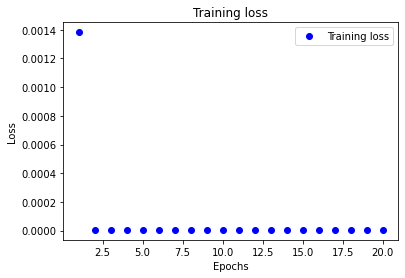

In [126]:
multi_lstm_loss = multi_lstm_history.history['loss']

multi_lstm_epochs = range(1, len(multi_lstm_loss) + 1)

# "bo" is for "blue dot"
plt.plot(multi_lstm_epochs, multi_lstm_loss, 'bo', label='Training loss')

plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [94]:
# check performance on test set
multi_predictions = multi_lstm_model.predict(multi_test_features)  

328/328 [==============================] - 4s 10ms/step


In [95]:
multi_predictions.shape

(10493, 1)

In [96]:
multi_predictions = multi_scaler2.inverse_transform(multi_predictions)

In [97]:
multi_predictions

array([[2.5628262e-05],
       [2.5628262e-05],
       [2.5670997e-05],
       ...,
       [2.5970146e-05],
       [2.5970146e-05],
       [2.5927411e-05]], dtype=float32)

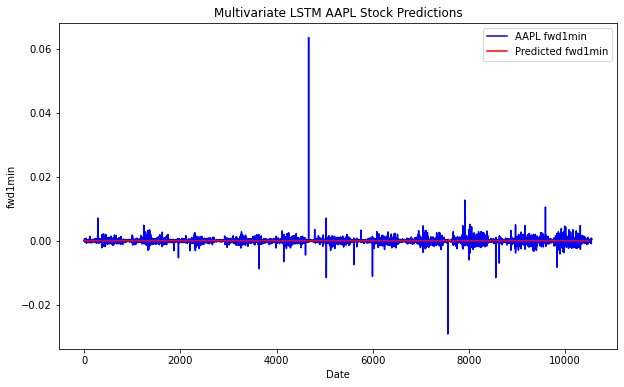

In [135]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))  
plt.plot(test.iloc[:,33:34].values, color='blue', label='AAPL fwd1min')
plt.plot(multi_predictions , color='red', label='Predicted fwd1min')  
plt.title('Multivariate LSTM AAPL Stock Predictions')  
plt.xlabel('Date')  
plt.ylabel('fwd1min')  
plt.legend()  
plt.show()  

univariate

In [99]:
# split dataset into train-test sets
# yGld_train = gold.iloc[1:train_len]
# yGld_test = gold.iloc[train_len:len(yGld)-1]

In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=((0,1)))
yGld_train_scaled = scaler.fit_transform(train.iloc[:,33:34].values)

In [101]:
features_set = []  
labels = []  
for i in range(60, len(train)-1):  
    features_set.append(yGld_train_scaled[i-60:i,0])
    labels.append(yGld_train_scaled[i,0])

In [102]:
train.isna().any()

ret1min       False
ret5min       False
ret10min      False
ret15min      False
ret20min      False
ret25min      False
ret30min      False
ret60min      False
ret120min     False
ret180min     False
ema5          False
ema10         False
ema15         False
ema20         False
ema25         False
ema30         False
ema60         False
ema120        False
ema180        False
macd          False
rsi           False
mfi           False
vol5min       False
vol10min      False
vol30min      False
vol60min      False
vol120min     False
vol180min     False
bbands        False
chaikinvol    False
roc           False
snr           False
vwap          False
fwd1min       False
dtype: bool

In [103]:
np.array(features_set).shape
np.array(labels).shape

(229939,)

In [104]:
print(len(features_set))
print(len(labels))
print(len(features_set[0]))
#print(features_set)
print(labels[0])

229939
229939
60
0.7989097658025054


In [105]:
features_set, labels = np.array(features_set), np.array(labels)  
print(features_set.shape)
print(features_set.shape[0], features_set.shape[1])
print(labels.shape)
print(labels)

(229939, 60)
229939 60
(229939,)
[0.79890977 0.79838661 0.80091396 ... 0.79945117 0.80010964 0.7998627 ]


In [106]:
from tensorflow.keras import optimizers

optimizer = optimizers.Adam(clipvalue=0.5)

In [107]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [108]:
lstm_model = Sequential()  
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1),unroll=False))  
lstm_model.add(Dropout(0.2))  
lstm_model.add(LSTM(units=50, return_sequences=True))  
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units=50, return_sequences=True))  
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units=50))  
lstm_model.add(Dropout(0.2))  
lstm_model.add(Dense(units = 1))  

lstm_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_20 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_21 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_21 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_22 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_22 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_23 (LSTM)              (None, 50)               

In [112]:
lstm_model.compile(optimizer = optimizer, loss = 'mean_squared_error')  
lstm_history = lstm_model.fit(features_set, labels, epochs = 20, batch_size = 32)  


Epoch 1/20
7186/7186 [==============================] - 165s 23ms/step - loss: 5.0906e-06
Epoch 2/20
7186/7186 [==============================] - 162s 23ms/step - loss: 5.0870e-06
Epoch 3/20
7186/7186 [==============================] - 163s 23ms/step - loss: 5.1013e-06
Epoch 4/20
7186/7186 [==============================] - 162s 23ms/step - loss: 5.0859e-06
Epoch 5/20
7186/7186 [==============================] - 162s 23ms/step - loss: 5.1101e-06
Epoch 6/20
7186/7186 [==============================] - 162s 23ms/step - loss: 5.0887e-06
Epoch 7/20
7186/7186 [==============================] - 162s 23ms/step - loss: 5.1073e-06
Epoch 8/20
7186/7186 [==============================] - 162s 23ms/step - loss: 5.1092e-06
Epoch 9/20
7186/7186 [==============================] - 163s 23ms/step - loss: 5.0936e-06
Epoch 10/20
7186/7186 [==============================] - 163s 23ms/step - loss: 5.1012e-06
Epoch 11/20
7186/7186 [==============================] - 162s 23ms/step - loss: 5.0975e-06
Epoch 12

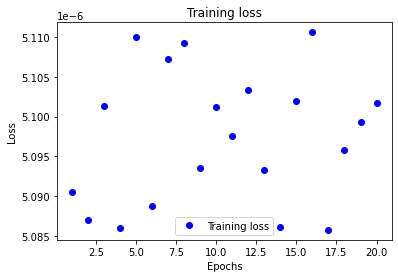

In [113]:
import matplotlib.pyplot as plt

lstm_loss = lstm_history.history['loss']

lstm_epochs = range(1, len(lstm_loss) + 1)

# "bo" is for "blue dot"
plt.plot(lstm_epochs, lstm_loss, 'bo', label='Training loss')

plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [127]:
total = pd.concat((train, test), axis=0)  
test_inputs = total.iloc[len(total) - len(test) - 60:,33:34].values  
print(test_inputs.shape)
print(len(test_inputs))
print(test_inputs)

(10613, 1)
10613
[[ 0.        ]
 [-0.00011772]
 [ 0.        ]
 ...
 [ 0.000252  ]
 [ 0.00025195]
 [ 0.00062516]]


In [128]:
# test_inputs = test_inputs.reshape(-1,1)  
print(test_inputs.shape)
test_inputs = scaler.fit_transform(test_inputs)  
print(test_inputs)

(10613, 1)
[[0.31411077]
 [0.31283866]
 [0.31411077]
 ...
 [0.31683404]
 [0.31683352]
 [0.32086658]]


In [129]:
test_features = []  
for i in range(60, len(test)):  
    test_features.append(test_inputs[i-60:i, 0])


In [130]:
test_features = np.array(test_features)  
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))  
print(test_features.shape)

(10493, 60, 1)


In [131]:
predictions = lstm_model.predict(test_features)  

328/328 [==============================] - 4s 11ms/step


In [132]:
predictions = scaler.inverse_transform(predictions)

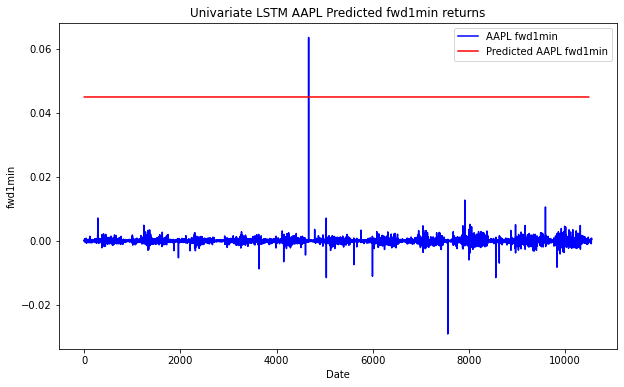

In [136]:
plt.figure(figsize=(10,6))  
plt.plot(test.iloc[:,33:34].values, color='blue', label='AAPL fwd1min')  
plt.plot(predictions , color='red', label='Predicted AAPL fwd1min')  
plt.title('Univariate LSTM AAPL Predicted fwd1min returns')  
plt.xlabel('Date')  
plt.ylabel('fwd1min')  
plt.legend()  
plt.show()  